In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error as msle

In [2]:
#import dataset
df = pd.read_csv('agr.csv')
df = df[['Price']]
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Price
0,6062.9
1,5885.7
2,5895.6
3,5807.0
4,5698.7
...,...
1483,16050.0
1484,15950.0
1485,15800.0
1486,15850.0


In [3]:
#check stationary
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df['Price'], regression ='c', maxlag=30)
print("ADF stat: %f" % adf1[0])
print("p-value: %f" % adf1[1])

ADF stat: -1.317725
p-value: 0.621025


In [4]:
#differencing data
adf2 = adfuller(np.diff(df['Price']), regression ='n', maxlag=30)
print("ADF stat: %f" % adf2[0])
print("p-value: %f" % adf2[1])

ADF stat: -6.240424
p-value: 0.000000


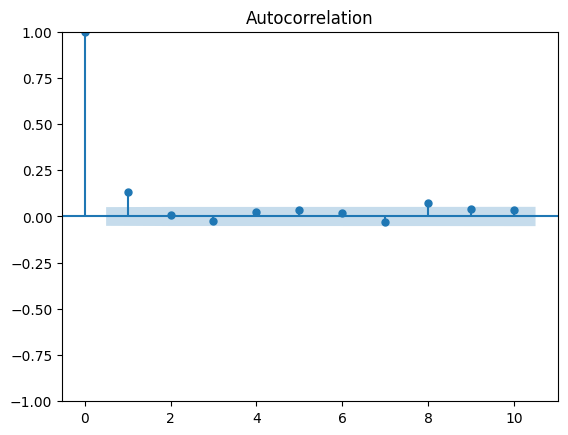

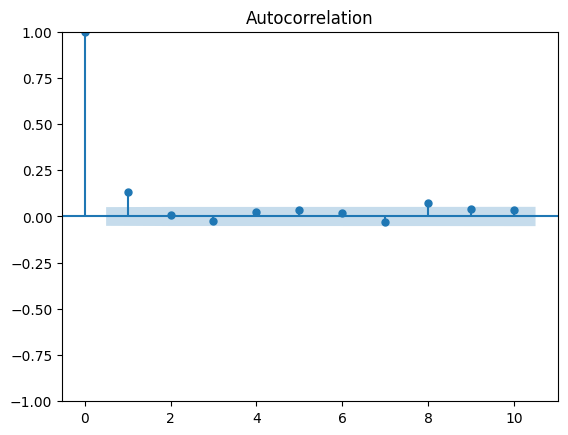

In [5]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

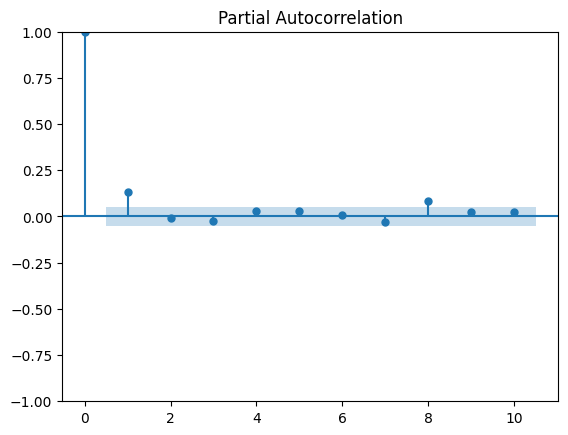

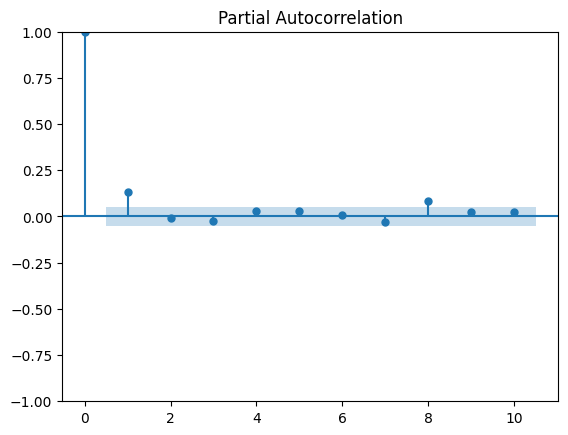

In [6]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [7]:
#RATIO 7:3

In [8]:
#data splitting ratio: 7:3
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df)) 
train_data73 = df[:train_size73]
test_data73 = df[train_size73 : train_size73 + test_size73]

In [9]:
#Training data ratio 7:3
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit73 = model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14844.519, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14880.952, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14866.851, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14865.791, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14881.171, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14869.307, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14869.082, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14867.516, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14870.897, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14870.269, Time=0.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14844.415, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0]             :

In [10]:
#Testing process ratio 7:3 
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73))

In [11]:
#creating prediction for next 30 days ratio 7:3
last_index73 =  df.index[-1]
last_data73 =pd.RangeIndex(start=last_index73, stop=last_index73+30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days73 = np.array(range(last_index73 + 1, last_index73 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days73 = model73.predict(len(x_next_30_days73))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days73)

Predicted prices for the next 30 days: 
[20804.10778206 20962.51469251 21100.03991364 20984.26579107
 20812.61173536 20875.49963582 21064.99941444 21060.03197961
 20870.37999181 20817.79474081 20990.14341405 21094.62233148
 20955.19149342 20809.17301862 20903.32326207 21076.85183605
 21036.00177412 20851.32445497 20835.87409311 21014.54582744
 21084.07289075 20927.76406903 20811.32894413 20931.20851404
 21083.16828847 21010.23144832 20837.23758392 20857.18801423
 21034.99605673 21069.11338916]


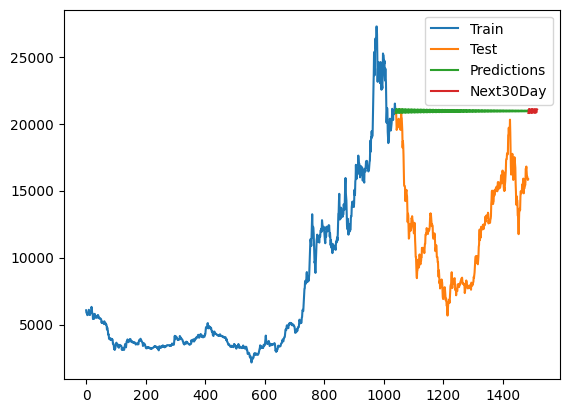

In [12]:
#Show plot ratio 7:3
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

plt.plot(last_data73,y_next_30_days73)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [13]:
#RATIO 8:2

In [14]:
#data splitting ratio: 8:2
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df)) 
train_data82 = df[:train_size82]
test_data82 = df[train_size82 : train_size82 + test_size82]

In [15]:
#Training data ratio 8:2
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit82 = model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17107.760, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17141.211, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17116.859, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17115.657, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17139.250, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17119.695, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17119.301, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17117.629, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17117.789, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17117.997, Time=0.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=17086.023, Time=1.03 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=17087.630, Time=1.45 sec
 ARIMA(3,1,4)(0,0,0)[0] interce

In [16]:
#Testing process ratio 8:2 
x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])
y_pred82 = model82.predict(n_periods=len(y_test82))

In [17]:
#creating prediction for next 30 days ratio 8:2
last_index82 =  df.index[-1]
last_data82 =pd.RangeIndex(start=last_index82, stop=last_index82 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days82 = np.array(range(last_index82 + 1, last_index82 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days82 = model82.predict(len(x_next_30_days82))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days82)

Predicted prices for the next 30 days: 
[8338.83706391 8301.01122143 8239.61587959 8263.30968271 8333.30681071
 8332.76858003 8264.72231454 8245.69458529 8308.41863972 8347.73477313
 8299.06114834 8246.56529286 8279.88159262 8343.27152278 8331.04611137
 8265.9204866  8259.33534359 8322.98373373 8350.28260027 8297.01275711
 8254.98831164 8296.05697712 8351.47079147 8329.13758708 8268.79955761
 8273.67364798 8336.10061245 8351.69703083 8296.04870352 8264.86403155]


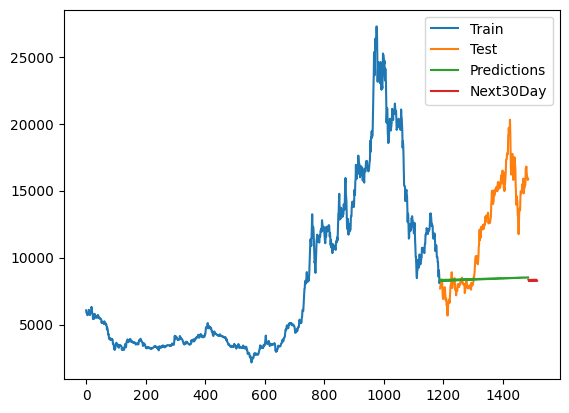

In [18]:
#Show plot ratio 8:2
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

plt.plot(last_data82,y_next_30_days82)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [19]:
#RATIO 9:1

In [20]:
#data splitting ratio: 9:1
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df)) 
train_data91 = df[:train_size91]
test_data91 = df[train_size91 : train_size91+ test_size91]

In [21]:
#Training data ratio 9:1
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit91 = model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19227.082, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19249.669, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19224.790, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19223.627, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19247.960, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19225.560, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19225.563, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19227.530, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19221.846, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19223.781, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=19223.787, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19223.002, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=19223.721, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.310 seconds


In [22]:
#Testing process ratio 9:1 
x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91))

In [23]:
#creating prediction for next 30 days ratio 9:1
last_index91 =  df.index[-1]
last_data91 =pd.RangeIndex(start=last_index91, stop=last_index91 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days91 = np.array(range(last_index91 + 1, last_index91 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days91 = model91.predict(len(x_next_30_days91))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days91)

Predicted prices for the next 30 days: 
[12438.78093381 12438.78093381 12438.78093381 12438.78093381
 12438.78093381 12438.78093381 12438.78093381 12438.78093381
 12438.78093381 12438.78093381 12438.78093381 12438.78093381
 12438.78093381 12438.78093381 12438.78093381 12438.78093381
 12438.78093381 12438.78093381 12438.78093381 12438.78093381
 12438.78093381 12438.78093381 12438.78093381 12438.78093381
 12438.78093381 12438.78093381 12438.78093381 12438.78093381
 12438.78093381 12438.78093381]


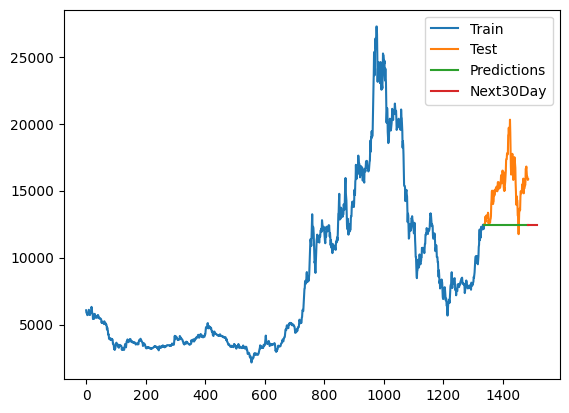

In [24]:
#Show plot ratio 9:1
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

plt.plot(last_data91,y_next_30_days91)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [25]:
#ACCURACY EVALUATION

In [26]:
#method to calculate mape
def calc_mape(actual, predicted):

    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate absolute percentage error
    absolute_error = np.abs((actual - predicted) / actual)
    
    # Handle division by zero cases
    absolute_error[np.isinf(absolute_error)] = 0.0
    
    # Calculate mean absolute percentage error
    mape = np.mean(absolute_error) * 100
    
    return mape

In [27]:
#accuracy evaluate 7:3
from sklearn.metrics import mean_absolute_error as mae

test_rmse73 = np.sqrt(np.mean((y_pred73 - y_test73)**2))
test_mape73 = calc_mape(y_test73, y_pred73)
test_mae73 = mae(y_test73, y_pred73)
test_msle73 = msle(y_test73, y_pred73)

print(test_rmse73)
print(test_mape73)
print(test_mae73)
print(test_msle73)

9457.144770431765
88.06489990635367
8681.445421399685
0.43702741497163233


In [28]:
#accuracy evaluate 8:2
from sklearn.metrics import mean_absolute_error as mae

test_rmse82 = np.sqrt(np.mean((y_pred82 - y_test82)**2))
test_mape82 = calc_mape(y_test82, y_pred82)
test_mae82 = mae(y_test82, y_pred82)
test_msle82 = msle(y_test82, y_pred82)

print(test_rmse82)
print(test_mape82)
print(test_mae82)
print(test_msle82)

5097.751228828855
27.80764970682416
3938.924643324144
0.19112130126852298


In [29]:
#accuracy evaluate 9:1
from sklearn.metrics import mean_absolute_error as mae

test_rmse91 = np.sqrt(np.mean((y_pred91 - y_test91)**2))
test_mape91 = calc_mape(y_test91, y_pred91)
test_mae91 = mae(y_test91, y_pred91)
test_msle91 = msle(y_test91, y_pred91)

print(test_rmse91)
print(test_mape91)
print(test_mae91)
print(test_msle91)

3353.155307529725
17.731251133329
2871.2025923181764
0.0531091933882035
